In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

## Importing benchmark data

In [11]:
data_256 = pd.read_csv("./build/benchmark256.csv", sep=";")
data_512 = pd.read_csv("./build/benchmark512.csv", sep=";")
data_1024 = pd.read_csv("./build/benchmark1024.csv", sep=";")
dims = [256, 512, 1024]
data = {256: data_256, 512: data_512, 1024:data_1024}

In [12]:
indices = {256:{}, 512:{}, 1024:{}}
indices

{256: {}, 512: {}, 1024: {}}

In [13]:
for dim in dims:
    nblocks = int(math.log2(dim / 4)) - 2
    indices[dim]["ref"] = [0]
    indices[dim]["ref_tr"] = [1]
    indices[dim]["blocked"] = list(range(2, 2 + nblocks))
    indices[dim]["tiled"] = list(range(2 + nblocks, 2 + nblocks * 2))
    indices[dim]["std"] = list(range(2 + nblocks * 2, 2 + nblocks * 2 + 2))
    indices[dim]["std_blocked"] = list(range(2 + nblocks * 2 + 2,
        2 + nblocks * 2 + 2 + 2 * nblocks))
    i = 2 + nblocks * 2 + 2 + 2 * nblocks
    indices[dim]["std_tiled"] = list(range(i, i + 2 * nblocks))
    j = i + 2 * nblocks
    indices[dim]["autovec"] = [j]
    j += 1
    indices[dim]["autovec_blocked"] = list(range(j, j + nblocks))
    indices[dim]["autovec_tiled"] = list(range(j + nblocks, j + 2 * nblocks))
    indices[dim]["blas"] = [j + 2 * nblocks]
#indices[128]

In [14]:
indices

{256: {'ref': [0],
  'ref_tr': [1],
  'blocked': [2, 3, 4, 5],
  'tiled': [6, 7, 8, 9],
  'std': [10, 11],
  'std_blocked': [12, 13, 14, 15, 16, 17, 18, 19],
  'std_tiled': [20, 21, 22, 23, 24, 25, 26, 27],
  'autovec': [28],
  'autovec_blocked': [29, 30, 31, 32],
  'autovec_tiled': [33, 34, 35, 36],
  'blas': [37]},
 512: {'ref': [0],
  'ref_tr': [1],
  'blocked': [2, 3, 4, 5, 6],
  'tiled': [7, 8, 9, 10, 11],
  'std': [12, 13],
  'std_blocked': [14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
  'std_tiled': [24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
  'autovec': [34],
  'autovec_blocked': [35, 36, 37, 38, 39],
  'autovec_tiled': [40, 41, 42, 43, 44],
  'blas': [45]},
 1024: {'ref': [0],
  'ref_tr': [1],
  'blocked': [2, 3, 4, 5, 6, 7],
  'tiled': [8, 9, 10, 11, 12, 13],
  'std': [14, 15],
  'std_blocked': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
  'std_tiled': [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
  'autovec': [40],
  'autovec_blocked': [41, 42, 43, 44, 45, 46],
  'autov

In [15]:
labels = [str(_dim) for _dim in dims]
labels

['256', '512', '1024']

In [16]:
def grouped_plot(names, dimensions = dims, filename=""):
    df = pd.DataFrame()
    for dim in dimensions:
        idx = []
        for _name in names:
            idx += indices[dim][_name]
        d = data[dim].iloc[idx].copy()
        nrows = len(d)
        col = [str(dim)] * nrows
        d["dim"] = col
        df = pd.concat([df, d], axis = 0)
    g = sns.catplot(data = df, kind = "bar", x = "dim", y = "total", hue = "name")
    if filename != " ":
       g.figure.savefig(filename)

## Reference gemm

$$
c_{i,j} = \sum_{l=0}^{k} a_{i,l} * b_{l,j}
$$

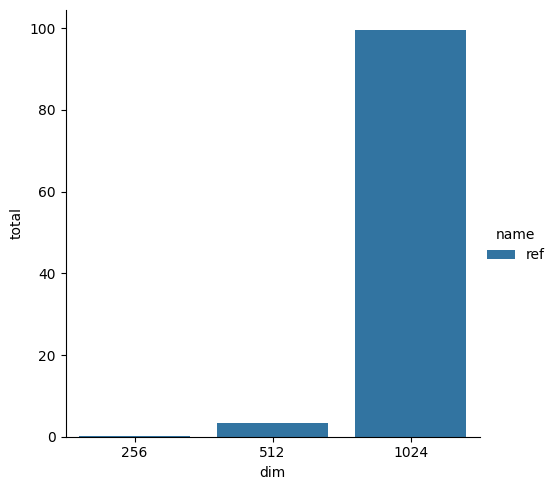

In [17]:
grouped_plot(["ref"], filename = "figures/gemm_reference")

## Transpose the matrix b

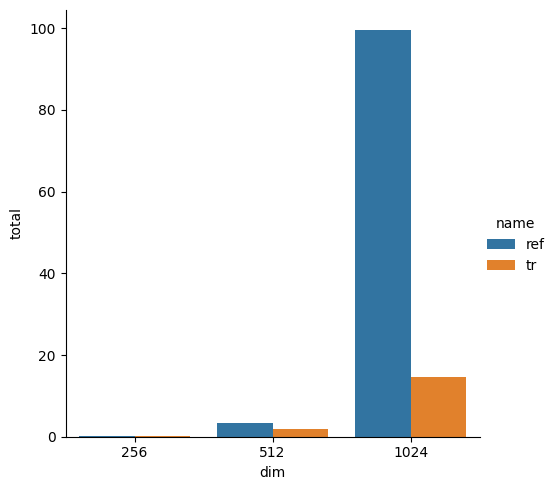

In [18]:
grouped_plot(["ref", "ref_tr"], filename = "figures/gemm_reference_transpose")

## Blocking

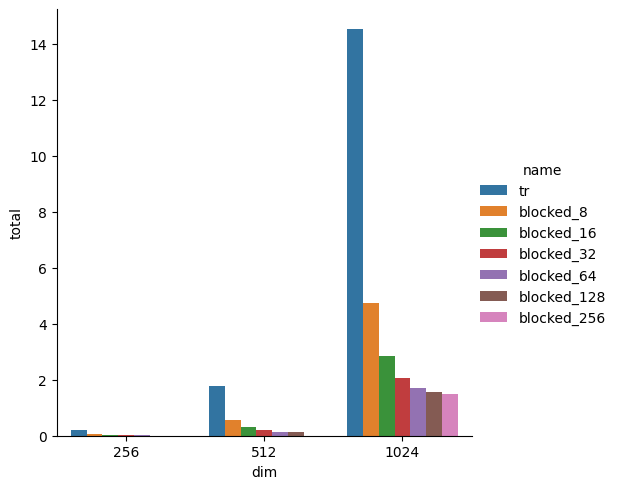

In [47]:
grouped_plot(["ref_tr", "blocked"], filename = "figures/gemm_blocked")

## Tiled

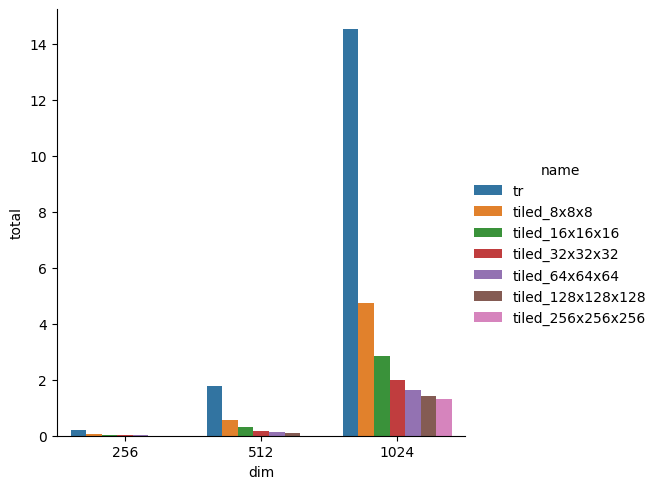

In [48]:
grouped_plot(["ref_tr", "tiled"], filename = "figures/gemm_tiled")

## Tiled vs Blocked

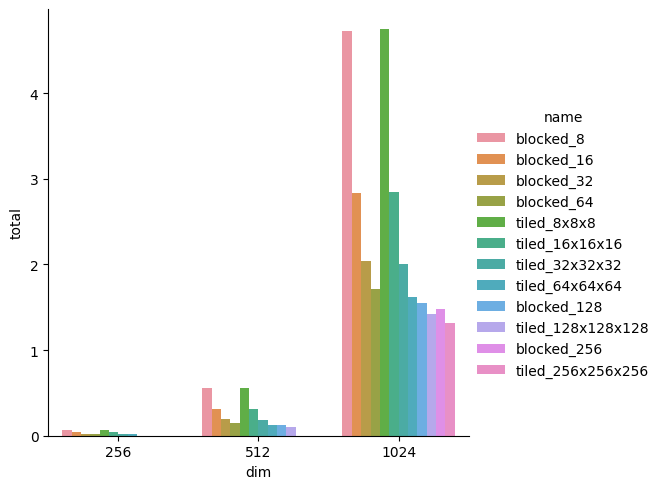

In [49]:
grouped_plot(["blocked", "tiled"])

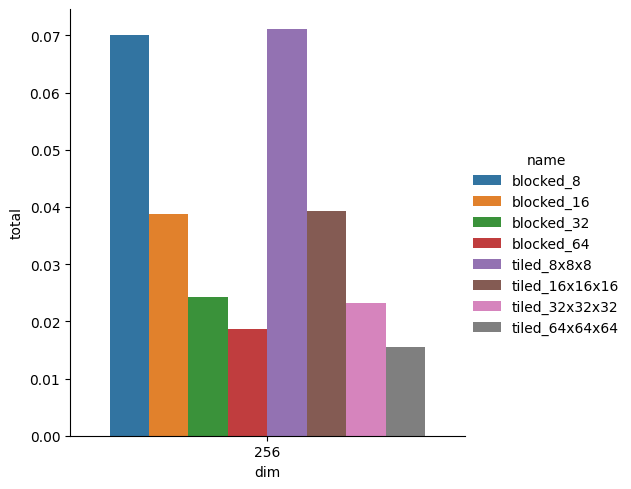

In [50]:
grouped_plot(["blocked", "tiled"], [256])

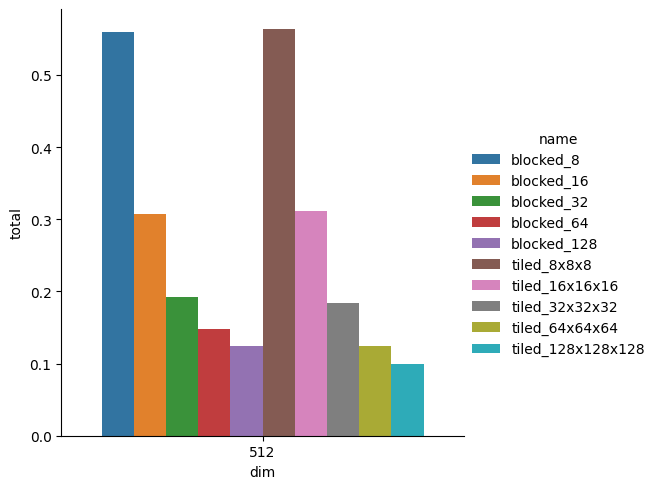

In [51]:
grouped_plot(["blocked", "tiled"], [512])

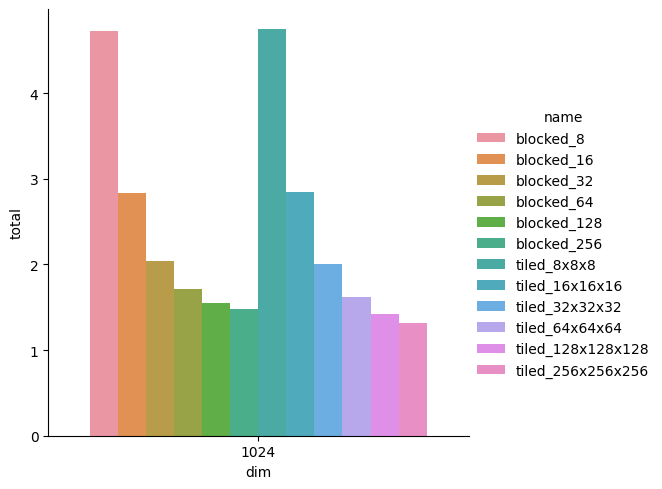

In [52]:
grouped_plot(["blocked", "tiled"], [1024])

## Vectorization with std::experimental::simd

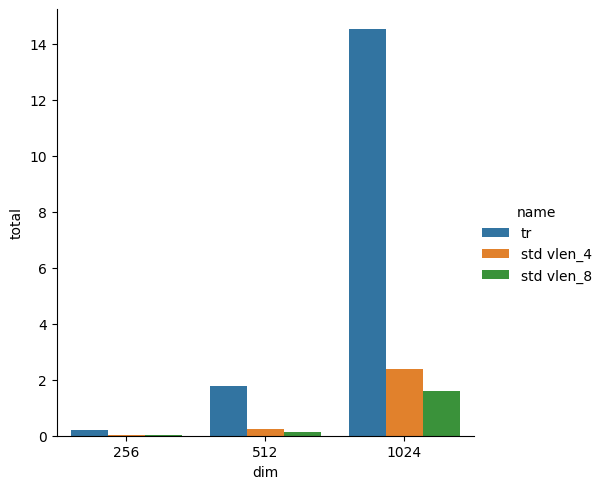

In [53]:
grouped_plot(["ref_tr", "std"], filename = "figures/gemm_std")

## Vectorization and blocking

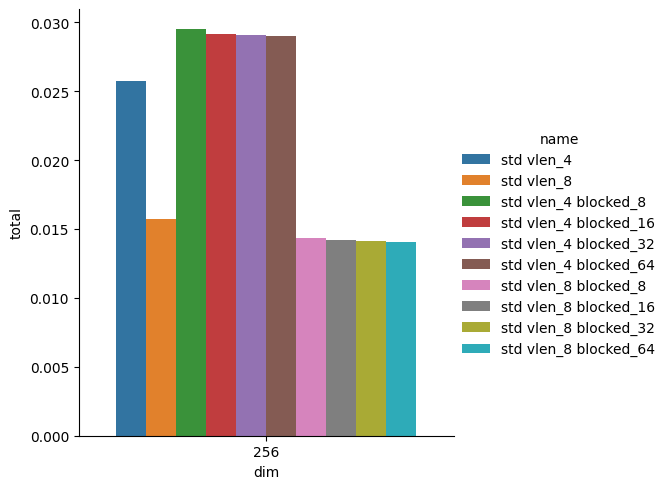

In [54]:
grouped_plot(["std", "std_blocked"], [256])

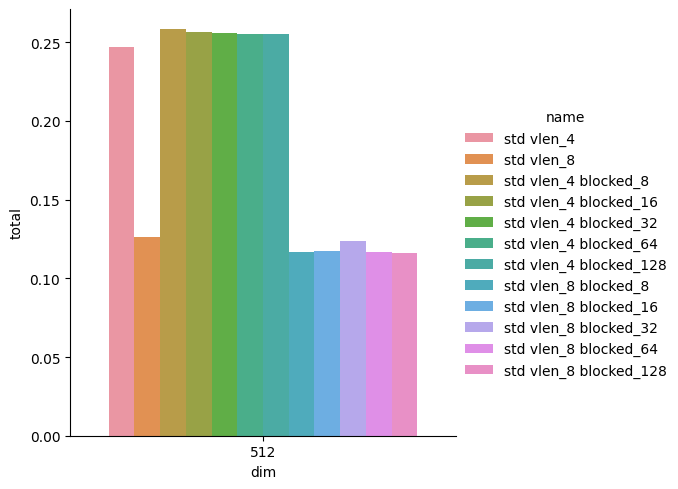

In [55]:
grouped_plot(["std", "std_blocked"], [512])

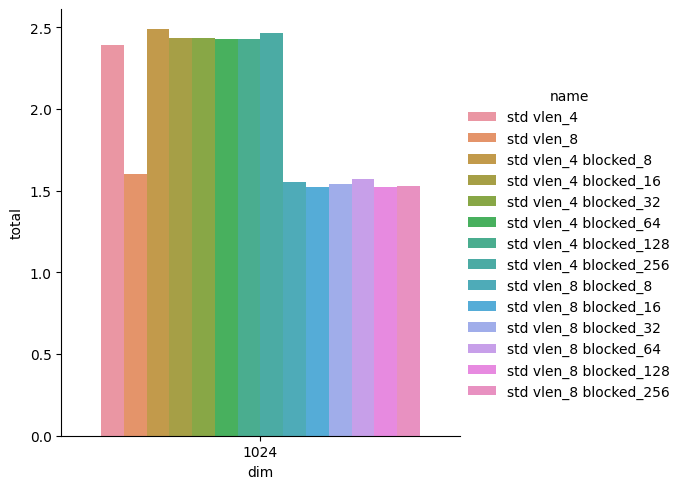

In [56]:
grouped_plot(["std", "std_blocked"], [1024])

## Vectorization and tiling

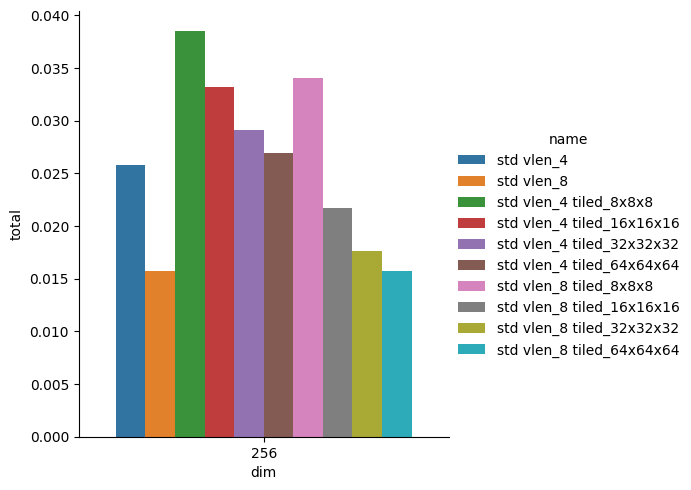

In [57]:
grouped_plot(["std", "std_tiled"], [256])

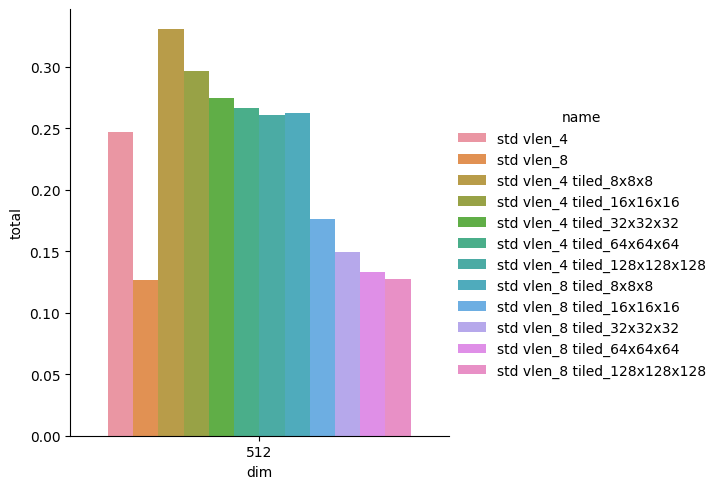

In [58]:
grouped_plot(["std", "std_tiled"], [512])

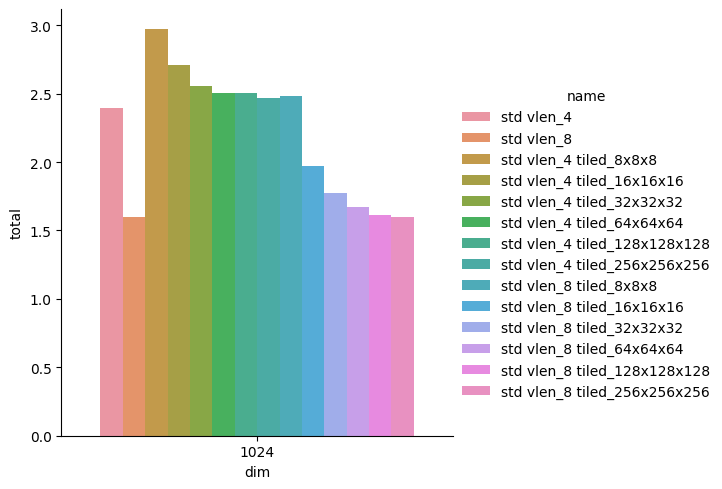

In [59]:
grouped_plot(["std", "std_tiled"], [1024])

## Autovectorization

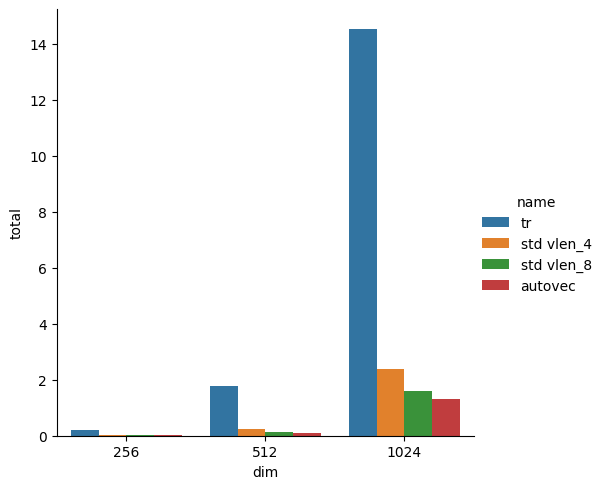

In [60]:
grouped_plot(["ref_tr", "std", "autovec"], filename = "figures/autovec")

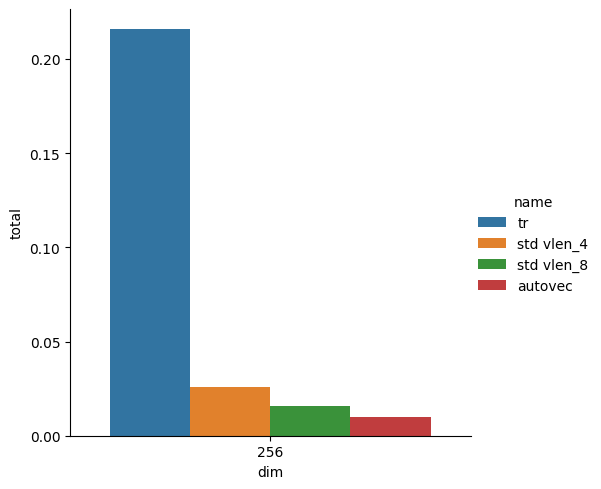

In [35]:
grouped_plot(["ref_tr", "std", "autovec"], [256])

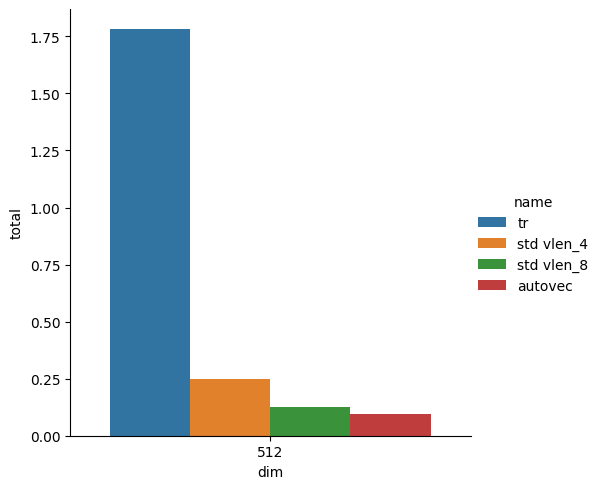

In [36]:
grouped_plot(["ref_tr", "std", "autovec"], [512])

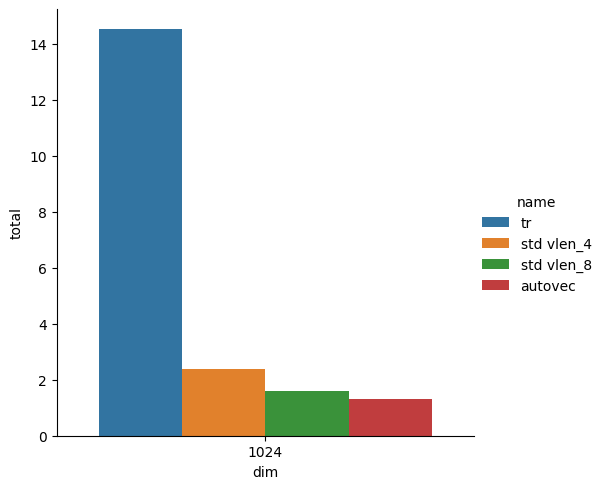

In [37]:
grouped_plot(["ref_tr", "std", "autovec"], [1024])

# Autovectorization and blocking

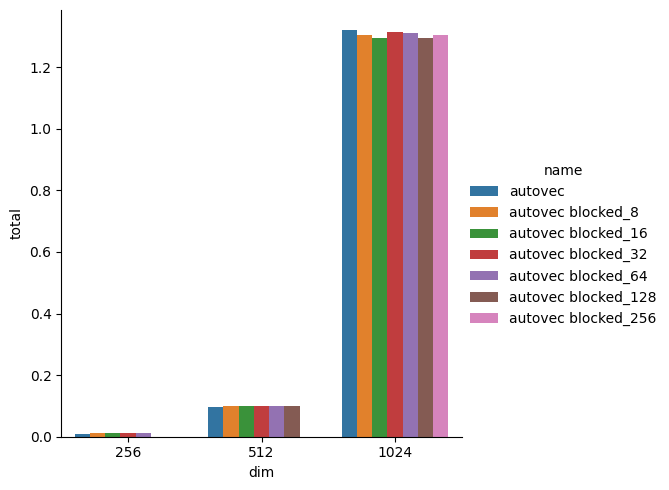

In [38]:
grouped_plot(["autovec", "autovec_blocked"])

## Autovectorization and tiling

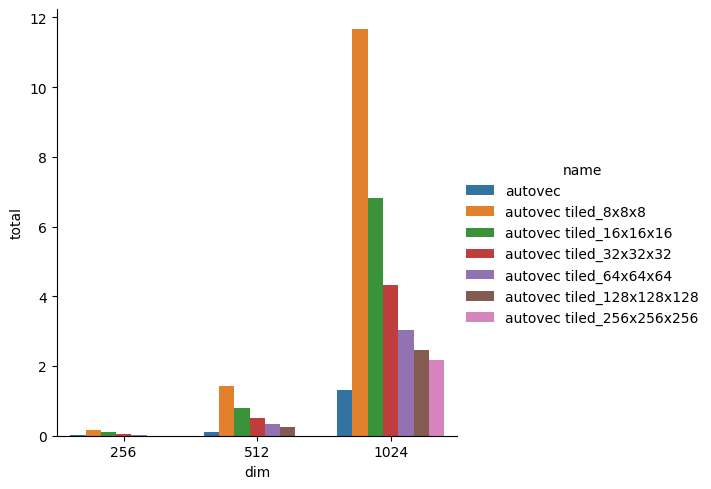

In [39]:
grouped_plot(["autovec", "autovec_tiled"])

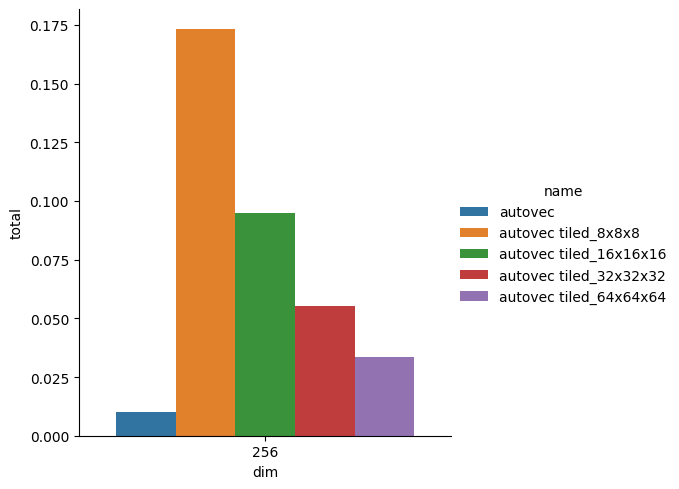

In [40]:
grouped_plot(["autovec", "autovec_tiled"], [256])

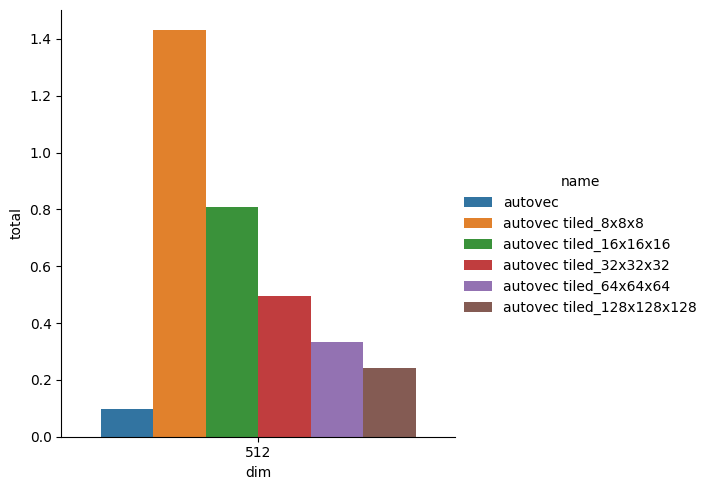

In [41]:
grouped_plot(["autovec", "autovec_tiled"], [512])

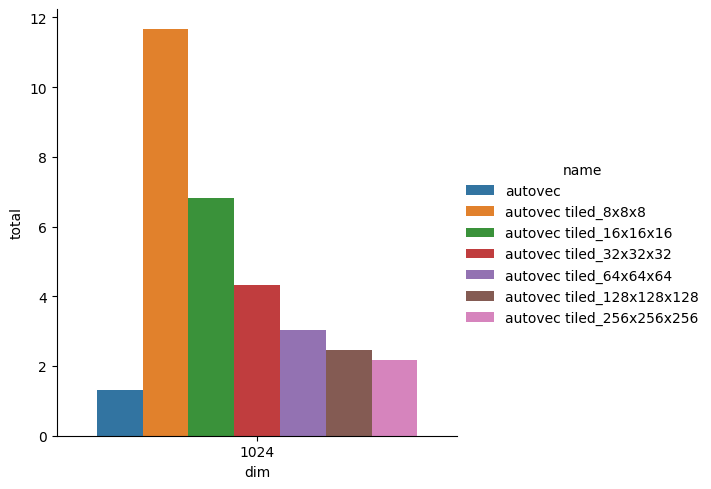

In [42]:
grouped_plot(["autovec", "autovec_tiled"], [1024])

## How close are we to blas

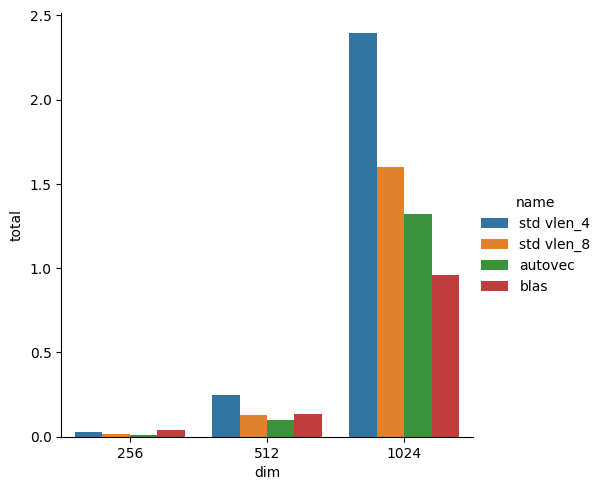

In [43]:
grouped_plot(["std", "autovec", "blas"], filename = "figures/gemm")

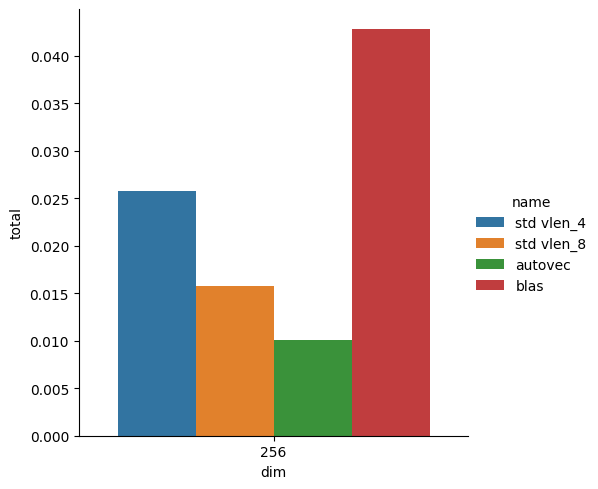

In [44]:
grouped_plot(["std", "autovec", "blas"], [256])

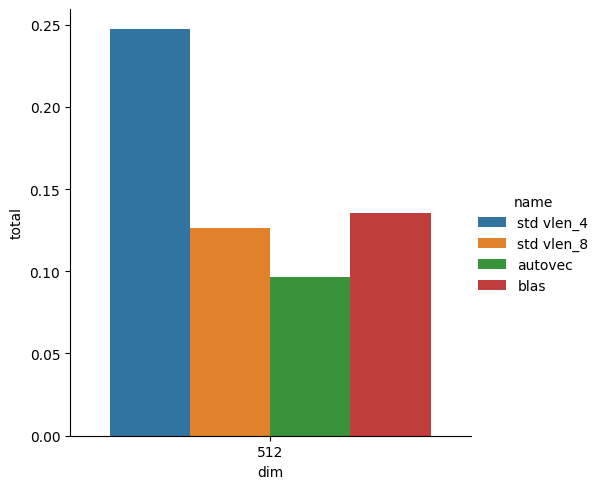

In [45]:
grouped_plot(["std", "autovec", "blas"], [512])

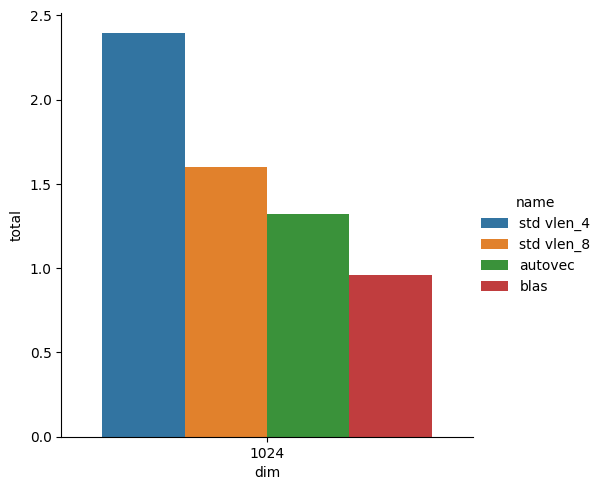

In [46]:
grouped_plot(["std", "autovec", "blas"], [1024])